<a href="https://colab.research.google.com/github/tinouirini/Homework/blob/main/enkeleinta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
#για wordclouds

In [3]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
#για sentiment analysis

In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/enkeleinta .xlsx')
# δημιουργία dataframe από το αρχείο των δεδομένων μας

In [5]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
#για τυχόν duplicates και rows με missing values

In [6]:

print(df.columns)

Index(['type', 'source', 'title', 'text', 'categories', 'sentiment', 'impact',
       'date', 'time', 'link'],
      dtype='object')


In [7]:
df['text'] = df[['title', 'text']].agg(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [8]:

#για συνένωση των στήλων title και text
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df

,type,source,title,text,categories,sentiment,impact,date,time,link,datetime
0,web,zinapost.gr,Γυναικοκτονία στο Μενίδι: «Καταπέλτης» η εισαγ...,Γυναικοκτονία στο Μενίδι: «Καταπέλτης» η εισαγ...,γυναικοκτονίες,Neutral,40.0000,2024-09-30,18:48:42,https://www.zinapost.gr/newsroom/news/gynaikok...,2024-09-30 18:48:42
1,web,agrotika-nea.gr,Γυναικοκτονία στο Μενίδι: «Καταπέλτης» η εισαγ...,Γυναικοκτονία στο Μενίδι: «Καταπέλτης» η εισαγ...,γυναικοκτονίες,Neutral,40.0000,2024-09-29,22:10:22,https://www.agrotika-nea.gr/gynaikoktonia-sto-...,2024-09-29 22:10:22
2,web,refreshnews.gr,Γυναικοκτονία στο Μενίδι: «Καταπέλτης» η εισαγ...,Γυναικοκτονία στο Μενίδι: «Καταπέλτης» η εισαγ...,γυναικοκτονίες,Neutral,40.0000,2024-09-29,16:48:51,https://refreshnews.gr/gynaikoktonia-sto-menid...,2024-09-29 16:48:51
3,web,news.gr,Γυναικοκτονία στο Μενίδι: «Καταπέλτης» η εισαγ...,Γυναικοκτονία στο Μενίδι: «Καταπέλτης» η εισαγ...,γυναικοκτονίες,Neutral,95.1403,2024-09-29,16:31:05,https://www.news.gr/ellada/article/3732766/gin...,2024-09-29 16:31:05
4,web,rproject.gr,«Εύχομαι οι φωνές να πολλαπλασιαστούν και να γ...,«Εύχομαι οι φωνές να πολλαπλασιαστούν και να γ...,γυναικοκτονίες,Positive,57.4505,2024-09-16,16:01:19,https://rproject.gr/article/eyhomai-oi-fones-n...,2024-09-16 16:01:19
...,...,...,...,...,...,...,...,...,...,...,...
355,web,lifo.gr,Γυναικοκτονία στο Μενίδι: «Η αστυνομία με κάλε...,Γυναικοκτονία στο Μενίδι: «Η αστυνομία με κάλε...,γυναικοκτονίες,Negative,99.5291,2024-05-16,18:13:43,https://www.lifo.gr/now/greece/gynaikoktonia-s...,2024-05-16 18:13:43
356,web,epirusonline.gr,Γυναικοκτονία στο Μενίδι: Συνελήφθη ο πρώην σύ...,Γυναικοκτονία στο Μενίδι: Συνελήφθη ο πρώην σύ...,γυναικοκτονίες,Neutral,74.9820,2024-05-16,17:43:57,https://epirusonline.gr/eidiseis/ellada/gynaik...,2024-05-16 17:43:57
357,web,mixanitouxronou.gr,Γυναικοκτονία στο Μενίδι. Συνελήφθη ο πρώην σύ...,Γυναικοκτονία στο Μενίδι. Συνελήφθη ο πρώην σύ...,γυναικοκτονίες,Negative,94.8200,2024-05-16,16:42:34,https://www.mixanitouxronou.gr/gynaikoktonia-s...,2024-05-16 16:42:34
358,web,lifo.gr,Γυναικοκτονία στο Μενίδι: Συνελήφθη ο πρώην σύ...,Γυναικοκτονία στο Μενίδι: Συνελήφθη ο πρώην σύ...,γυναικοκτονίες,Neutral,99.5291,2024-05-16,16:39:18,https://www.lifo.gr/now/greece/gynaikoktonia-s...,2024-05-16 16:39:18


In [9]:
# Συνάρτηση για έλεγχο αν η ώρα είναι πλήρης και έγκυρη
def is_valid_time_format(time_str):
    if time_str is None or time_str == '':
        return False
    try:
        pd.to_datetime(time_str, format='%H:%M:%S')
        return True
    except (ValueError, TypeError):
        return False

# Φιλτράρισμα των γραμμών που δεν έχουν έγκυρη ώρα
df = df[df['time'].apply(is_valid_time_format)]

In [10]:
# Συνένωση των στηλών 'date' και 'time' σε μια νέα στήλη 'datetime'
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')

In [11]:
#Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ.

df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour

In [14]:
#!python -m spacy download el_core_news_sm

In [15]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

In [16]:
file_path = "/content/gdrive/MyDrive/report1/emotions_worlds.xlsx"

In [17]:
# Έλεγχος και δημιουργία του φακέλου αν δεν υπάρχει
import os
folder_path = os.path.dirname(file_path)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Ο φάκελος δημιουργήθηκε επιτυχώς: {folder_path}")
else:
    print(f"Ο φάκελος υπάρχει ήδη: {folder_path}")

Ο φάκελος υπάρχει ήδη: /content/gdrive/MyDrive/report1


In [18]:
#δημιουργώ ένα df που να περιλαμβάνει μόνο τις στήλες: date, section, author και text για καποίες αναλύσεις
selected_cols_df = df[["datetime","text"]]

In [19]:
selected_cols_df.tail(1)

,datetime,text
359,2024-05-16 16:39:10,Γυναικοκτονία στο Μενίδι: Είχε απειλήσει τη 40...


<Axes: xlabel='month'>

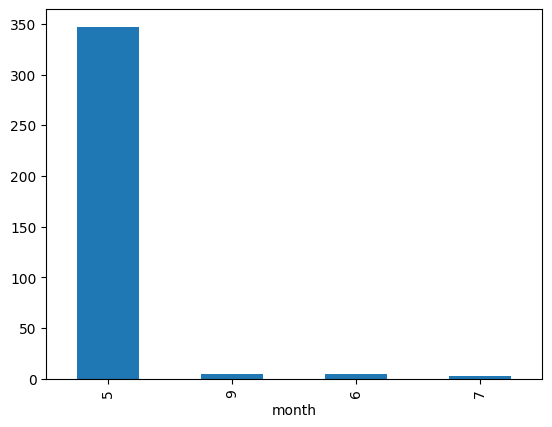

In [20]:
df['month'].value_counts().plot(kind='bar')

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [22]:
# afairoume tonous
text = df['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [23]:
#ενώνω τα κείμενα
text = df['text'].str.cat(sep = ' ')

In [24]:
extra_stopwords = {
    # Θέμα: Γυναικοκτονίες
    "gynaikoktonia", "γυναικοκτονία", "γυναικοκτονια", "γυναικοκτόνος", "γυναικοκτονίας",
    "δολοφονία", "δολοφόνος", "δολοφονήθηκε", "δολοφονήσουν", "δολοφονίας", "δολοφόνοι",
    "δολοφονεί", "δολοφονείτο", "δολοφονησε", "δολοφονημένη", "ανθρωποκτονία", "δολοφονικό",
    "φόνου", "έγκλημα", "έγκληματος", "εγκληματίας", "εγκληματική", "εγκληματικότητας",
    "θύμα", "θύματα", "νεκρή", "νεκρός", "έπεσε νεκρή", "κακοποίηση", "βία",
    "ενδοοικογενειακή βία", "μαχαίρωσε", "πυροβόλησε", "πνιγμός", "χτύπησε",
    "τραγωδία", "τραγικό", "κατηγορούμενος", "σύζυγος", "σχέση", "σχέσης", "Κυριακής",
    "ερωτική", "χωρισμός", "ζήλια",


    # Κλασικά ελληνικά stopwords (συχνότατες λέξεις χωρίς νόημα για ανάλυση)
    "και", "ή", "ούτε", "αλλά", "να", "που", "πως", "ότι", "επίσης", "κτλ",
    "δηλαδή", "λοιπόν", "δηλαδη", "δηλ", "όμως", "καθώς", "επειδή", "διότι",
    "για", "με", "χωρίς", "κατά", "παρά", "ως", "ενώ", "πριν", "αφού",
    "εάν", "αν", "έχει", "έχουν", "οπου", "δυο", "πολύ", "λίγο",
    "εδώ", "εκεί", "πάνω", "κάτω", "πάλι", "όταν", "όπου", "τότε", "τώρα" , "είτε" , "είπε"
}
# Προσθήκη των extra_stopwords στις default stop words του spaCy
all_stopwords = set(nlp.Defaults.stop_words).union(extra_stopwords)

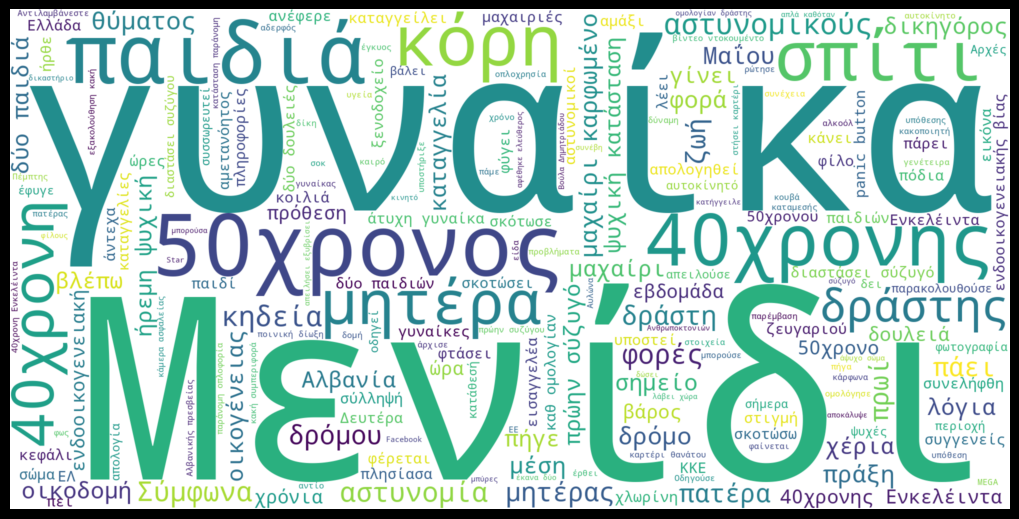

In [25]:
wordcloud = WordCloud(
    stopwords =all_stopwords,
    width = 2000,
    height = 1000,
    background_color = 'white'
  ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [28]:
mask = np.array(Image.open("/content/gdrive/MyDrive/istockphoto-178517041-612x612.jpg"))

In [29]:
wordcloud = WordCloud(stopwords=all_stopwords, background_color='white', mode='RGBA', max_words=5000, mask=mask).generate(text)

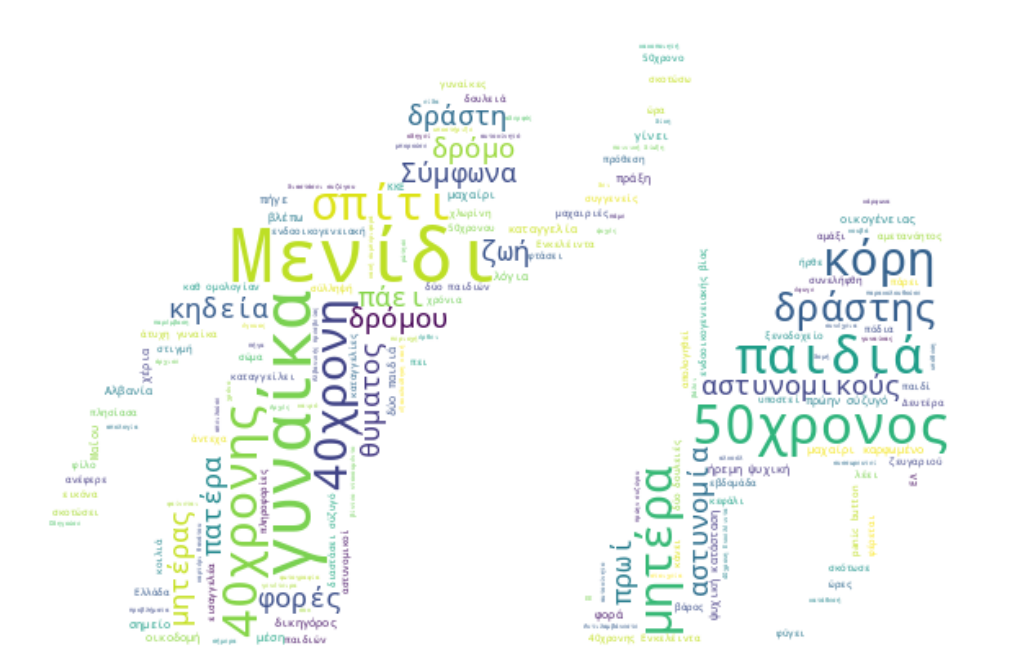

In [30]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)



<Axes: ylabel='type'>

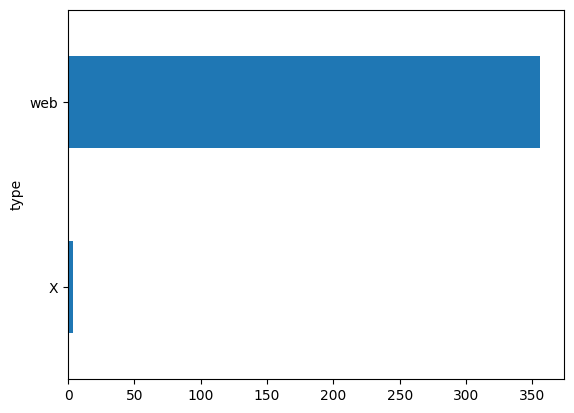

In [31]:
df['type'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [32]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
articles_per_day = df.groupby(df['date'].dt.strftime('%Y-%m-%d')).size().reset_index(name='count')


dates_with_more_than_100_articles = articles_per_day[articles_per_day['count'] > 100]['date']


print(dates_with_more_than_100_articles)

2    2024-05-18
Name: date, dtype: object


In [34]:
# Καθορισμός φάσεων με φίλτρα
phase1 = df[(df['date'] >= '2024-05-07') & (df['date'] <= '2024-05-15')]  # Awareness
phase2 = df[(df['date'] >= '2024-05-16') & (df['date'] <= '2024-05-30')]  # Peak
phase3 = df[(df['date'] >= '2024-05-31') & (df['date'] <= '2024-08-31')]  # Decline

# Καταμέτρηση άρθρων
count1 = phase1.shape[0]
count2 = phase2.shape[0]
count3 = phase3.shape[0]

# Εκτύπωση αποτελεσμάτων
print("Άρθρα ανά φάση της Κυκλοειδούς Προσοχής του Downs:")
print(f"1η Φάση (07–15 Μαΐου 2024 - Awareness): {count1} άρθρα")
print(f"2η Φάση (16–30 Μαΐου 2024 - Peak): {count2} άρθρα")
print(f"3η Φάση (31 Μαΐου – 31 Αυγούστου 2024 - Decline): {count3} άρθρα")

Άρθρα ανά φάση της Κυκλοειδούς Προσοχής του Downs:
1η Φάση (07–15 Μαΐου 2024 - Awareness): 0 άρθρα
2η Φάση (16–30 Μαΐου 2024 - Peak): 347 άρθρα
3η Φάση (31 Μαΐου – 31 Αυγούστου 2024 - Decline): 8 άρθρα


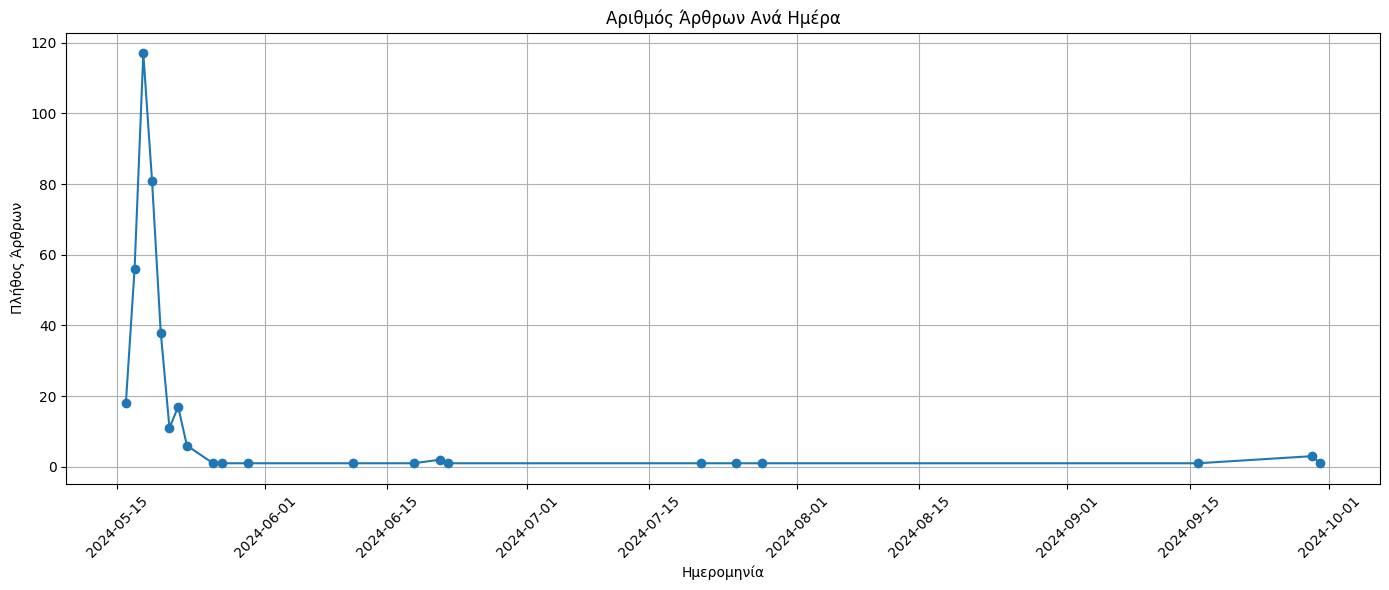

In [35]:
# Ομαδοποίηση άρθρων ανά ημέρα
articles_per_day = df.groupby('date').size().reset_index(name='count')

# Δημιουργία γραμμικού διαγράμματος
plt.figure(figsize=(14, 6))
plt.plot(articles_per_day['date'], articles_per_day['count'], marker='o', linestyle='-')

# Τίτλος και άξονες
plt.title('Αριθμός Άρθρων Ανά Ημέρα')
plt.xlabel('Ημερομηνία')
plt.ylabel('Πλήθος Άρθρων')
plt.grid(True)
plt.xticks(rotation=45)

# Εμφάνιση διαγράμματος
plt.tight_layout()
plt.show()

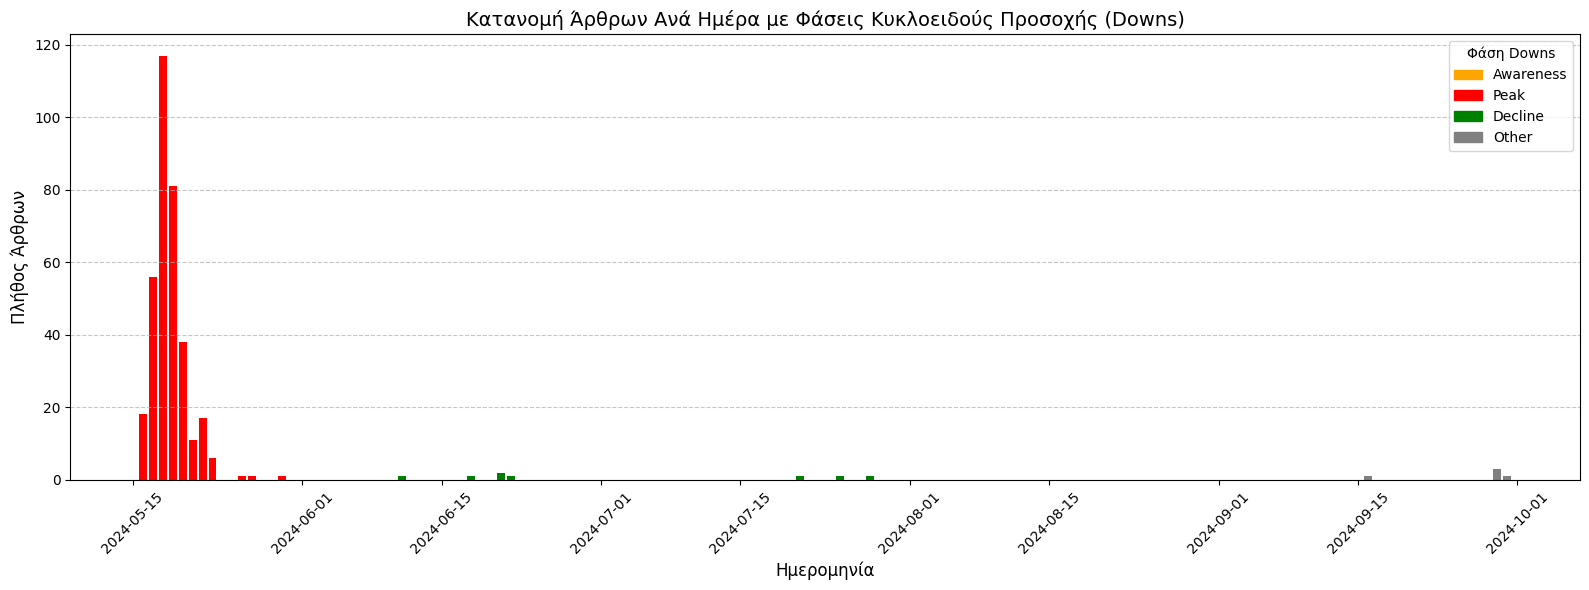

In [37]:
# Ορισμός χρωμάτων ανά φάση Downs
def classify_phase(date):
    if pd.Timestamp('2024-05-07') <= date <= pd.Timestamp('2024-05-15'):
        return 'Awareness'
    elif pd.Timestamp('2024-05-16') <= date <= pd.Timestamp('2024-05-30'):
        return 'Peak'
    elif pd.Timestamp('2024-05-31') <= date <= pd.Timestamp('2024-08-31'):
        return 'Decline'
    else:
        return 'Other'

# Δημιουργία νέας στήλης "phase"
articles_per_day['phase'] = articles_per_day['date'].apply(classify_phase)

# Χρώματα για κάθε φάση
color_map = {
    'Awareness': 'orange',
    'Peak': 'red',
    'Decline': 'green',
    'Other': 'gray'
}
colors = articles_per_day['phase'].map(color_map)

# Διάγραμμα
plt.figure(figsize=(16, 6))
bars = plt.bar(articles_per_day['date'], articles_per_day['count'], color=colors)

plt.title('Κατανομή Άρθρων Ανά Ημέρα με Φάσεις Κυκλοειδούς Προσοχής (Downs)', fontsize=14)
plt.xlabel('Ημερομηνία', fontsize=12)
plt.ylabel('Πλήθος Άρθρων', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Προσθήκη λεζάντας
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
plt.legend(handles=legend_patches, title="Φάση Downs")

plt.tight_layout()
plt.show()

<ipython-input-38-5a889c3fdbd3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['phase'] = filtered_df['date'].apply(classify_phase)


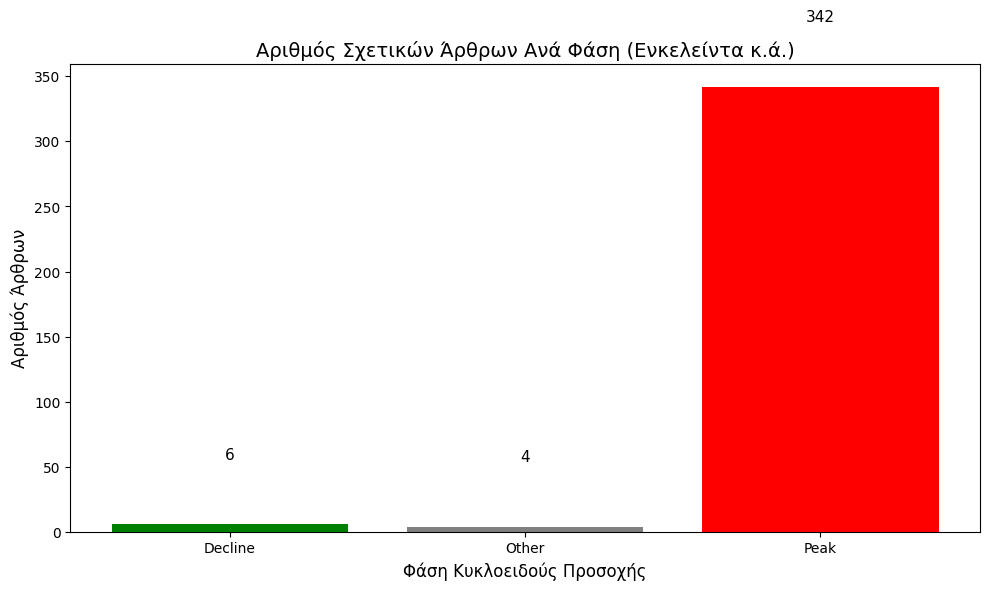

In [38]:
# Κάνω lowercase το text και το title για ευκολία
df['text'] = df['text'].astype(str).str.lower()
df['title'] = df['title'].astype(str).str.lower()

# Ορίζω τα keywords που θες να ψάξεις
keywords = [
    "ενκελειντα", "μενιδι", "Μενίδι",
    "Ενκελειντα", "μενίδι",
    "Ενκελέιντα", "Μενιδι"
]

# Δημιουργω το pattern για αναζήτηση
import re
pattern = '|'.join(re.escape(k) for k in keywords)

# Φιλτράρω τα άρθρα που περιέχουν τα keywords
filtered_df = df[
    df['text'].str.contains(pattern, regex=True) | df['title'].str.contains(pattern, regex=True)
]

# Ορίζω φάσεις Downs

def classify_phase(date):
    if pd.Timestamp('2024-05-07') <= date <= pd.Timestamp('2024-05-15'):
        return 'Awareness'
    elif pd.Timestamp('2024-05-16') <= date <= pd.Timestamp('2024-05-30'):
        return 'Peak'
    elif pd.Timestamp('2024-05-31') <= date <= pd.Timestamp('2024-08-31'):
        return 'Decline'
    else:
        return 'Other'

# Εφαρμόζω τη φάση σε κάθε άρθρο
filtered_df['phase'] = filtered_df['date'].apply(classify_phase)

# Μετράω άρθρα ανά φάση
phase_counts = filtered_df['phase'].value_counts().sort_index()

# Ορίζω τα χρώματα για κάθε φάση
colors = {
    'Awareness': 'orange',
    'Peak': 'red',
    'Decline': 'green',
    'Other': 'gray'
}

# Φτιάχνω το γράφημα
plt.figure(figsize=(10, 6))
bar_colors = [colors.get(phase, 'gray') for phase in phase_counts.index]
bars = plt.bar(phase_counts.index, phase_counts.values, color=bar_colors)

# Προσθέτω τίτλους και αριθμούς πάνω από τις μπάρες
plt.title("Αριθμός Σχετικών Άρθρων Ανά Φάση (Ενκελείντα κ.ά.)", fontsize=14)
plt.xlabel("Φάση Κυκλοειδούς Προσοχής", fontsize=12)
plt.ylabel("Αριθμός Άρθρων", fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, str(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

In [39]:
print(filtered_df['phase'].value_counts().sort_index())

phase
Decline      6
Other        4
Peak       342
Name: count, dtype: int64
